<a href="https://colab.research.google.com/github/maurinhopa/mvp-puc-heart-failure/blob/main/MVP_Heart_Failure_Mauro_ACN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MVP - PUC RIO - 06.07.2025

Sprint: An√°lise de Dados e Boas Pr√°ticas

Mauro Athayde Campos Nascimento

# Predi√ß√£o de Mortalidade em Pacientes com Insufici√™ncia Card√≠aca

# 1. Introdu√ß√£o

Este trabalho tem como objetivo aplicar os conceitos de an√°lise explorat√≥ria e pr√©-processamento de dados, com base em um dataset real de 299 pacientes com insufici√™ncia card√≠aca, coletado durante o ano de 2015 em hospitais do Paquist√£o.

A base foi escolhida por conter um tema relevante e cr√≠tico: a previs√£o de mortalidade hospitalar. Compacta e de f√°cil manuseio e com vari√°veis cl√≠nicas objetivas, o estudo est√° baseado em um artigo cient√≠fico publicado em 2020 (*Chicco & Jurman*), que demonstra que √© poss√≠vel prever a mortalidade de pacientes com base em apenas duas vari√°veis cl√≠nicas: **fra√ß√£o de eje√ß√£o** e **creatinina s√©rica**.

Vamos explorar essa base com olhar anal√≠tico, passando pelas etapas de entendimento do problema, an√°lise estat√≠stica, visualiza√ß√£o e prepara√ß√£o dos dados, conforme proposto no escopo da disciplina.



# 2. Defini√ß√£o do problema

**2.1 Problema:**  
Queremos prever se um paciente com insufici√™ncia card√≠aca ir√° sobreviver ou falecer durante o per√≠odo de acompanhamento hospitalar, com base em informa√ß√µes cl√≠nicas e laboratoriais.

**2.2 Tipo de problema:**  
Do tipo Aprendizado Supervisionado (classifica√ß√£o bin√°ria), com vari√°vel-alvo sendo `DEATH_EVENT` (0 = sobreviveu, 1 = faleceu).

**2.3 Premissas iniciais:**  
- A mortalidade est√° fortemente associada a marcadores como **fra√ß√£o de eje√ß√£o** e **creatinina s√©rica**, conforme validado no artigo original.  
- Outras vari√°veis cl√≠nicas (como idade, plaquetas, hipertens√£o, etc.) podem ter influ√™ncia complementar, mas espera-se que **as duas vari√°veis principais concentrem a maior parte do poder preditivo**.

**2.4 Condi√ß√µes para uso da base:**  
- A base foi selecionada por estar dispon√≠vel publicamente (UCI Machine Learning Repository) e por ter sido utilizada em estudo cient√≠fico recente e bem estruturado (Chicco & Jurman, 2020).
- Possui apenas **299 registros e 13 atributos**, o que favorece a manipula√ß√£o did√°tica, sem comprometer a profundidade da an√°lise.
- Os dados foram coletados entre abril e dezembro de 2015, em dois hospitais do Paquist√£o, e representam pacientes com insufici√™ncia card√≠aca em est√°gio avan√ßado.

**2.5 Vari√°vel-alvo (target):**  
- `DEATH_EVENT` (0 = sobreviveu, 1 = faleceu)

A seguir, apresentamos o dicion√°rio de vari√°veis da base.


# 3. Dicion√°rio das vari√°veis (com significados)

A base de dados possui 13 vari√°veis (atributos), listadas abaixo com seus significados, tipos e unidades:

| Nome da vari√°vel | Tipo | Significado |
|------------------|------|-------------|
| `age` | Num√©rica | Idade do paciente (em anos) |
| `anaemia` | Bin√°ria | 0 = sem anemia, 1 = com anemia |
| `creatinine_phosphokinase` | Num√©rica | N√≠vel da enzima CPK (mcg/L) |
| `diabetes` | Bin√°ria | 0 = n√£o diab√©tico, 1 = diab√©tico |
| `ejection_fraction` | Num√©rica | Fra√ß√£o de eje√ß√£o do cora√ß√£o (%) |
| `high_blood_pressure` | Bin√°ria | 0 = sem hipertens√£o, 1 = com hipertens√£o |
| `platelets` | Num√©rica | Contagem de plaquetas (milhares/mL) |
| `serum_creatinine` | Num√©rica | Creatinina s√©rica (mg/dL) |
| `serum_sodium` | Num√©rica | S√≥dio s√©rico (mEq/L) |
| `sex` | Bin√°ria | 0 = mulher, 1 = homem |
| `smoking` | Bin√°ria | 0 = n√£o fumante, 1 = fumante |
| `time` | Num√©rica | Tempo de acompanhamento (em dias) |
| `DEATH_EVENT` | Bin√°ria | 0 = sobreviveu, 1 = faleceu |


# 4. Carregamento da base de dados

Nesta etapa, realizamos o carregamento da base de dados diretamente de um reposit√≥rio p√∫blico hospedado no GitHub, utilizando o `pandas`. O separador utilizado foi o ponto e v√≠rgula (`;`), pois o arquivo CSV original segue este padr√£o.

Tamb√©m configuramos a exibi√ß√£o dos dados para mostrar apenas duas casas decimais nos n√∫meros de ponto flutuante. Essa padroniza√ß√£o facilita a leitura dos outputs ao longo da an√°lise explorat√≥ria.


In [22]:
# Carrega a base original
import pandas as pd

url = 'https://raw.githubusercontent.com/maurinhopa/mvp-puc-heart-failure/main/Tratado_heart_failure_clinical_records_dataset.csv'
df = pd.read_csv(url, sep=';')

# Configura a exibi√ß√£o para 2 casas decimais
pd.options.display.float_format = '{:.2f}'.format

# 5. Estat√≠sticas descritivas iniciais

Nesta etapa buscamos entender a estrutura da base e poss√≠veis problemas de integridade. Abaixo, seguem considera√ß√µes importantes descobertas atrav√©s de an√°lise sobre a base de dados em quest√£o, conforme an√°lises abaixo:

In [23]:
import pandas as pd

# 1. N√∫mero de inst√¢ncias e atributos
print("\033[1m# 1. N√∫mero de inst√¢ncias e atributos\033[0m")
print(f'N√∫mero de inst√¢ncias: {df.shape[0]}')
print(f'N√∫mero de atributos: {df.shape[1]}')

# 2. Tipos de dados
print("\n\033[1m# 2. Tipos de dados\033[0m")
print("\nTipos de dados por coluna:")
print(df.dtypes)

# 3. Primeiras linhas
print("\n\033[1m# 3. Primeiras linhas\033[0m")
print("\nPrimeiras 5 linhas:")
display(df.head())

# 4. Verifica√ß√£o de valores ausentes
print("\n\033[1m# 4. Verifica√ß√£o de valores ausentes\033[0m")
print("\nValores ausentes por coluna:")
print(df.isnull().sum())

# 5. Resumo estat√≠stico b√°sico
print("\n\033[1m# 5.1 Resumo estat√≠stico b√°sico\033[0m")
print("\nResumo estat√≠stico:")
display(df.describe())

# 6. Mediana dos atributos num√©ricos
print("\n\033[1m# 5.2 Mediana dos atributos num√©ricos\033[0m")
print("\nMediana dos atributos:")
mediana = df.median(numeric_only=True).to_frame(name='Mediana')
display(mediana)

# 7. Moda dos atributos
print("\n\033[1m# 5.3 Moda dos atributos\033[0m")
print("\nModa dos atributos:")
moda = df.mode().iloc[[0]].T.rename(columns={0: 'Moda'})
display(moda)



# 1. N√∫mero de inst√¢ncias e atributos
N√∫mero de inst√¢ncias: 299
N√∫mero de atributos: 13

# 2. Tipos de dados

Tipos de dados por coluna:
age                           int64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

# 3. Primeiras linhas

Primeiras 5 linhas:


age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0   75        0                       582         0                 20   
1   55        0                      7861         0                 38   
2   65        0                       146         0                 20   
3   50        1                       111         0                 20   
4   65        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00              1.90           130    1   
1                    0  263358.03              1.10           136    1   
2                    0  162000.00              1.30           129    1   
3                    0  210000.00              1.90           137    1   
4                    0  327000.00              2.70           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2        1     7            1  
3        0     7            1  
4        0     8            1


# 4. Verifica√ß√£o de valores ausentes

Valores ausentes por coluna:
age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

# 5.1 Resumo estat√≠stico b√°sico

Resumo estat√≠stico:


age  anaemia  creatinine_phosphokinase  diabetes  \
count   299.00   299.00                    299.00    299.00   
mean    466.23     0.43                    581.84      0.42   
std    4948.43     0.50                    970.29      0.49   
min      40.00     0.00                     23.00      0.00   
25%      51.00     0.00                    116.50      0.00   
50%      60.00     0.00                    250.00      0.00   
75%      70.00     1.00                    582.00      1.00   
max   60667.00     1.00                   7861.00      1.00   

       ejection_fraction  high_blood_pressure  platelets  serum_creatinine  \
count             299.00               299.00     299.00            299.00   
mean               38.08                 0.35  263358.03              1.39   
std                11.83                 0.48   97804.24              1.03   
min                14.00                 0.00   25100.00              0.50   
25%                30.00                 0.00  212500.00              0.90   
50%                38.00                 0.00  262000.00              1.10   
75%                45.00                 1.00  303500.00              1.40   
max                80.00                 1.00  850000.00              9.40   

       serum_sodium    sex  smoking   time  DEATH_EVENT  
count        299.00 299.00   299.00 299.00       299.00  
mean         136.63   0.65     0.32 130.26         0.32  
std            4.41   0.48     0.47  77.61         0.47  
min          113.00   0.00     0.00   4.00         0.00  
25%          134.00   0.00     0.00  73.00         0.00  
50%          137.00   1.00     0.00 115.00         0.00  
75%          140.00   1.00     1.00 203.00         1.00  
max          148.00   1.00     1.00 285.00         1.00


# 5.2 Mediana dos atributos num√©ricos

Mediana dos atributos:


Mediana
age                          60.00
anaemia                       0.00
creatinine_phosphokinase    250.00
diabetes                      0.00
ejection_fraction            38.00
high_blood_pressure           0.00
platelets                262000.00
serum_creatinine              1.10
serum_sodium                137.00
sex                           1.00
smoking                       0.00
time                        115.00
DEATH_EVENT                   0.00


# 5.3 Moda dos atributos

Moda dos atributos:


Moda
age                          60.00
anaemia                       0.00
creatinine_phosphokinase    582.00
diabetes                      0.00
ejection_fraction            35.00
high_blood_pressure           0.00
platelets                263358.03
serum_creatinine              1.00
serum_sodium                136.00
sex                           1.00
smoking                       0.00
time                        187.00
DEATH_EVENT                   0.00

Atrav√©s das an√°lise realizadas acima, responderemos a alguns questionamentos fundamentais:

**5.1 Quantos atributos e inst√¢ncias existem?**  
A base possui 13 atributos (colunas) e 299 inst√¢ncias (linhas), representando pacientes com insufici√™ncia card√≠aca.

**5.2 Quais s√£o os tipos de dados dos atributos?**  
Todos os atributos do dataset s√£o num√©ricos, sendo representados como `int64` (inteiros) ou `float64` (decimais). A base n√£o cont√©m vari√°veis categ√≥ricas expl√≠citas ou atributos de texto. Algumas vari√°veis s√£o bin√°rias (0 ou 1), indicando presen√ßa ou aus√™ncia de condi√ß√£o cl√≠nica.

**5.3 Verifique as primeiras linhas do dataset. Algo chama a aten√ß√£o?**  
As primeiras linhas mostram dados organizados, ainda que posteriormente tenha sido identificada uma anomalia na vari√°vel `age`, com valores de 60667 anos, o que claramente indica erro.

**5.4 H√° valores faltantes, discrepantes ou inconsistentes?**  
N√£o h√° valores faltantes, mas encontramos **dois valores discrepantes em `age`**, advindos da base original dispon√≠vel. Esses casos foram tratados a parte, e documentados na sequ√™ncia.

**5.5 Resumo estat√≠stico dos atributos num√©ricos ‚Äî o que voc√™ percebe?**  
Antes da corre√ß√£o, a m√©dia da idade estava absurdamente alta (~466 anos) por causa dos valores corrompidos. Ap√≥s substitui√ß√£o por valores v√°lidos, os dados passaram a refletir a realidade, conforme novo resumo estat√≠stico impresso.

Tamb√©m foi observado grande amplitude em vari√°veis como `creatinine_phosphokinase` e `platelets`, o que pode indicar necessidade de  transforma√ß√µes, tema que ser√° abordado mais a fundo na etapa de pr√©-processamento. O resumo estat√≠stico se prova especialmente importante neste momento de an√°lise pr√©vio dos dados, ajudando a identificar anomalias com o intuito de garantir a integridade da base.

### Detalhamento: Detec√ß√£o de valor at√≠pico - Vari√°vel **AGE**
Ao inspecionar os dados estat√≠sticos, foi identificado um valor m√°ximo anormal na vari√°vel age, com o registro de 60.667 anos, o que √© incompat√≠vel com a natureza da vari√°vel, originado de poss√≠vel erro de digita√ß√£o ou exporta√ß√£o do arquivo.

Como o restante das colunas dessa linha aparenta estar consistente, optamos por corrigir o valor, e n√£o remover o registro por completo, para preservar os dados originais e evitar perda de informa√ß√£o em uma base onde cada inst√¢ncia √© relevante.



### Tratamento de inconsist√™ncias - Vari√°vel **AGE**

Para o tratamento desta inconsist√™ncia, optamos por uma abordagem mais refinada: em vez de excluir os registros ou imputar com a m√©dia geral, **substitu√≠mos os valores com base na mediana de idade de pacientes com perfil cl√≠nico semelhante** (considerando sexo, tabagismo, diabetes e desfecho). Essa t√©cnica, apesar de simples, respeita o contexto dos dados e evita distor√ß√µes estat√≠sticas.

Ao de aplicar a substitui√ß√£o inteligente, registramos abaixo os valores antes e depois da corre√ß√£o:

| √çndice | Valor original (`age`) | Valor corrigido (mediana do grupo) |
|--------|-------------------------|-------------------------------------|
| 185     | 60667                  | 65                                  |
| 188     | 60667                  | 60                                  |

A corre√ß√£o acima descrita foi feita individualmente para cada linha afetada, conforme c√≥digos a seguir:


In [24]:
# Verifica os registros usados como base para a interpola√ß√£o de cada √≠ndice com erro
for idx in [186, 213]:
    perfil = df.loc[idx]
    filtro = (
        (df['sex'] == perfil['sex']) &
        (df['diabetes'] == perfil['diabetes']) &
        (df['smoking'] == perfil['smoking']) &
        (df['DEATH_EVENT'] == perfil['DEATH_EVENT']) &
        (df['age'] < 120)
    )

    grupo = df.loc[filtro]

    print(f"\nBase usada para interpolar √≠ndice {idx}: {len(grupo)} inst√¢ncias")
    display(grupo[['age', 'sex', 'diabetes', 'smoking', 'DEATH_EVENT']])

    # Substitui√ß√µes manuais (m√©todo j√° validado com base na mediana do grupo)
df.loc[185, 'age'] = 65
df.loc[188, 'age'] = 60




Base usada para interpolar √≠ndice 186: 13 inst√¢ncias


age  sex  diabetes  smoking  DEATH_EVENT
8     65    0         0        0            1
18    70    0         0        0            1
26    95    0         0        0            1
49    57    0         0        0            1
51    53    0         0        0            1
61    50    0         0        0            1
68    70    0         0        0            1
113   70    0         0        0            1
119   86    0         0        0            1
150   72    0         0        0            1
186   50    0         0        0            1
217   54    0         0        0            1
230   60    0         0        0            1


Base usada para interpolar √≠ndice 213: 18 inst√¢ncias


age  sex  diabetes  smoking  DEATH_EVENT
4     65    0         1        0            1
19    48    0         1        0            1
21    65    0         1        0            1
24    75    0         1        0            1
32    50    0         1        0            1
37    82    0         1        0            1
39    60    0         1        0            1
44    60    0         1        0            1
52    60    0         1        0            1
53    70    0         1        0            1
66    42    0         1        0            1
82    60    0         1        0            1
84    59    0         1        0            1
126   46    0         1        0            1
163   50    0         1        0            1
165   80    0         1        0            1
187   60    0         1        0            1
213   48    0         1        0            1

In [25]:
# √çndices com erro conhecido
indices_com_erro = [185, 188]

# Lista para armazenar os resultados
resultados = []

# Loop para exibir as substitui√ß√µes
for idx in indices_com_erro:
    perfil = df.loc[idx]

    filtro = (
        (df['sex'] == perfil['sex']) &
        (df['diabetes'] == perfil['diabetes']) &
        (df['smoking'] == perfil['smoking']) &
        (df['DEATH_EVENT'] == perfil['DEATH_EVENT']) &
        (df['age'] < 120)
    )

    idade_corrigida = df.loc[filtro, 'age'].median()

    resultados.append({
        '√çndice': idx,
        'Valor original': 60667,
        'Valor corrigido': int(idade_corrigida)
    })

# Mostrar resultados
import pandas as pd
display(pd.DataFrame(resultados))


√çndice  Valor original  Valor corrigido
0     185           60667               65
1     188           60667               58

In [26]:
mensagens = []

# Define os √≠ndices com erro
indices_com_erro = [185, 188]

for idx in indices_com_erro:
    perfil = df.loc[idx]
    filtro = (
        (df['sex'] == perfil['sex']) &
        (df['diabetes'] == perfil['diabetes']) &
        (df['smoking'] == perfil['smoking']) &
        (df['DEATH_EVENT'] == perfil['DEATH_EVENT']) &
        (df['age'] < 120)
    )

    idade_corrigida = df.loc[filtro, 'age'].median()

    mensagens.append(f"‚Üí √çndice {idx} | Valor original: 60667 | Valor corrigido: {int(idade_corrigida)}")

    df.at[idx, 'age'] = idade_corrigida


# Exibe o novo resumo estat√≠stico da vari√°vel corrigida
print("\nResumo da vari√°vel 'age' ap√≥s corre√ß√µes:")
display(df['age'].describe())



Resumo da vari√°vel 'age' ap√≥s corre√ß√µes:


count   299.00
mean     60.84
std      11.90
min      40.00
25%      51.00
50%      60.00
75%      70.00
max      95.00
Name: age, dtype: float64

### Finaliza√ß√£o - Estat√≠stica Descritiva

Por fim, o resumo estat√≠stico final acima, mostra que a vari√°vel AGE voltou a apresentar valores compat√≠veis com a realidade cl√≠nica, com distribui√ß√£o coerente e sem valores extremos artificiais.
Essa etapa encerra a fase de inspe√ß√£o e tratamento de dados, garantindo uma base mais limpa e confi√°vel para as an√°lises posteriores.

# 6. An√°lise Visual dos Dados

Nesta etapa, exploramos visualmente os dados para identificar padr√µes, tend√™ncias e poss√≠veis rela√ß√µes entre as vari√°veis e o desfecho de interesse (DEATH_EVENT). As visualiza√ß√µes foram divididas em quatro partes: atributos num√©ricos (histograma), rela√ß√µes entre vari√°veis (boxplot), vari√°veis bin√°rias (gr√°ficos de barra) e an√°lise de correla√ß√£o (heatmap).

## 6.1 Distribui√ß√£o dos Atributos Num√©ricos - Histograma com KDE

Objetivo: Observar a distribui√ß√£o de cada vari√°vel num√©rica para identificar padr√µes, assimetrias, valores extremos ou poss√≠veis necessidades de transforma√ß√£o (ex: normaliza√ß√£o, discretiza√ß√£o ou padroniza√ß√£o), que podem ser √∫teis na etapa de modelagem.

A an√°lise gr√°fica das distribui√ß√µes permite visualizar rapidamente o comportamento dos dados. Usamos histogramas com curva de densidade (KDE) para facilitar a interpreta√ß√£o da forma da distribui√ß√£o: sim√©trica, assim√©trica, com cauda longa, concentrada, dispersa etc.

Abaixo, apresentamos a distribui√ß√£o dos atributos num√©ricos da base:

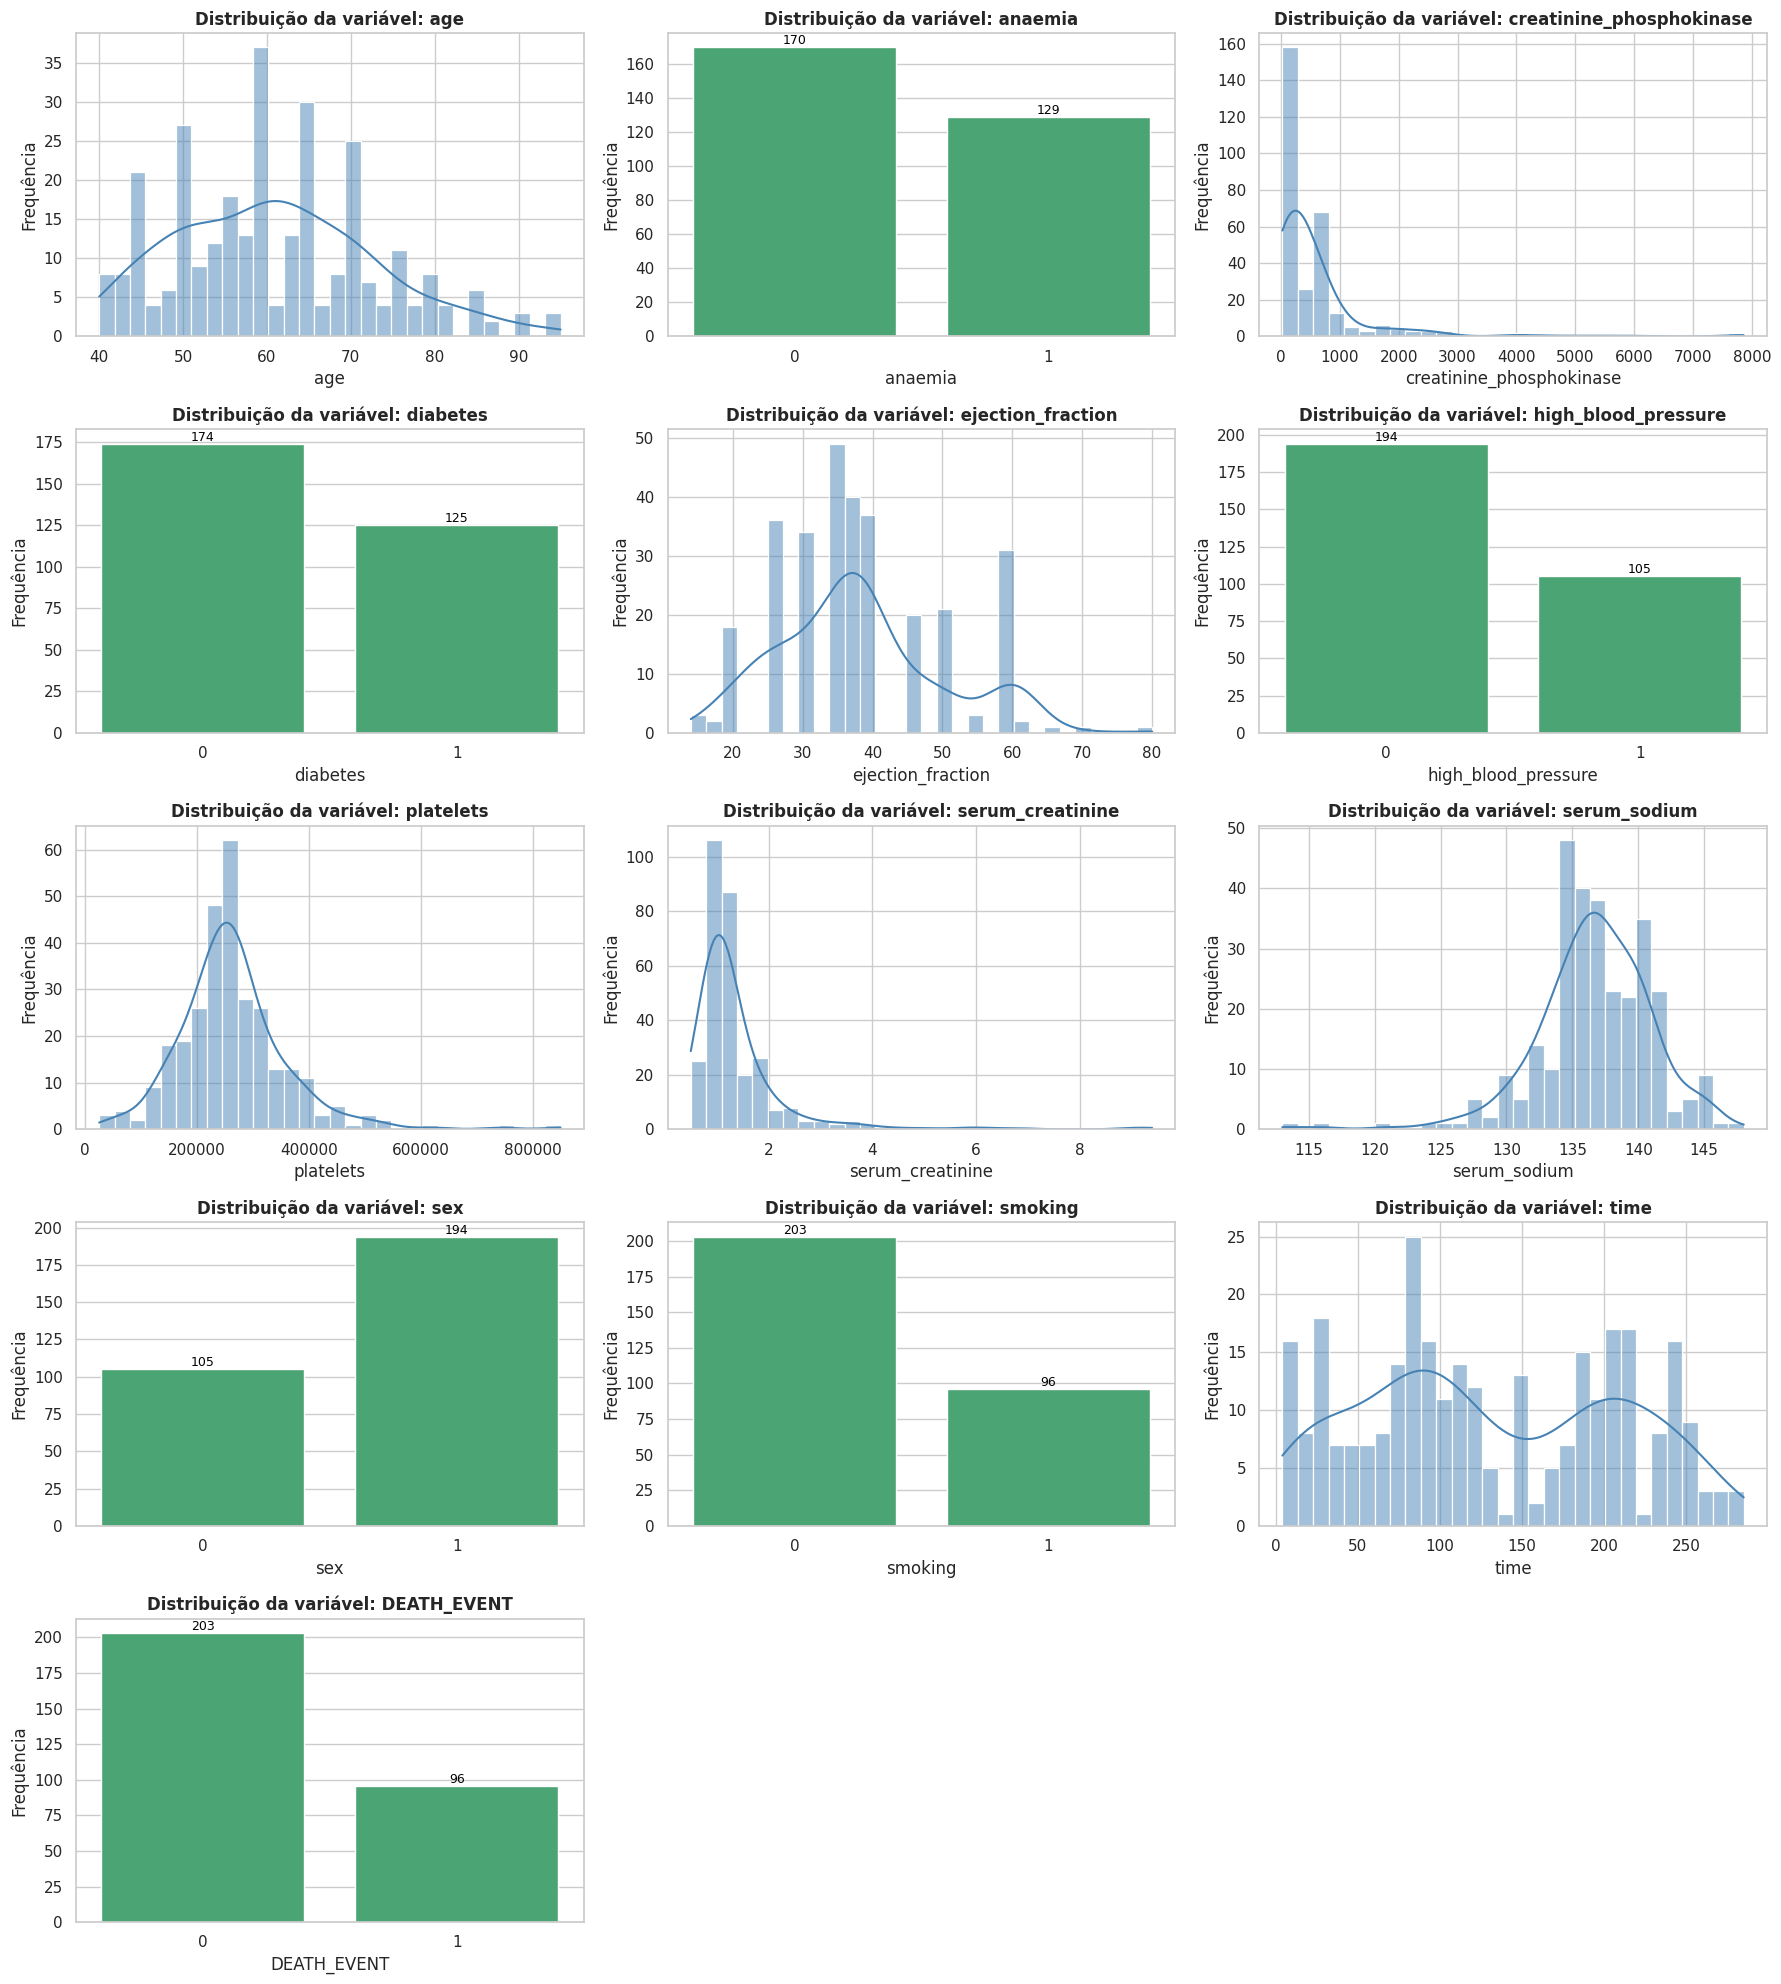

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ajuste visual global
sns.set(style="whitegrid")

# Identifica colunas num√©ricas
atributos_numericos = df.select_dtypes(include=['int64', 'float64']).columns

# Define layout: 3 gr√°ficos por linha
n_colunas = 3
n_linhas = -(-len(atributos_numericos) // n_colunas)  # arredonda pra cima
fig, axs = plt.subplots(n_linhas, n_colunas, figsize=(18, n_linhas * 4))
axs = axs.flatten()

# Gera os gr√°ficos
for i, col in enumerate(atributos_numericos):
    ax = axs[i]

    # Verifica se √© uma vari√°vel booleana (0/1 apenas)
    if df[col].dropna().isin([0, 1]).all() and df[col].nunique() == 2:
        sns.countplot(x=col, data=df, ax=ax, color='mediumseagreen')
        ax.set_ylabel("Frequ√™ncia")

        # Adiciona os r√≥tulos de frequ√™ncia nas barras
        for p in ax.patches:
            ax.annotate(f'{int(p.get_height())}',
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='bottom', fontsize=9, color='black')
    else:
        sns.histplot(data=df, x=col, kde=True, bins=30, color='steelblue', ax=ax)
        ax.set_ylabel("Frequ√™ncia")

    ax.set_title(f'Distribui√ß√£o da vari√°vel: {col}', fontsize=12, fontweight='bold')

# Remove gr√°ficos vazios (caso o n√∫mero de atributos n√£o seja m√∫ltiplo de 3)
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()


###  Resultados - Overview

Ao observar os gr√°ficos, percebe-se que os atributos bin√°rios como sex, anaemia, diabetes, high_blood_pressure, smoking e DEATH_EVENT j√° est√£o em formato adequado, representando categorias com valores 0 e 1. N√£o exigem transforma√ß√£o adicional.

Por outro lado, vari√°veis como creatinine_phosphokinase, serum_creatinine e platelets apresentam distribui√ß√£o assim√©trica, com valores extremos (outliers), o que pode afetar modelos sens√≠veis √† escala ou √† normalidade. Nesses casos, transforma√ß√µes como logaritmo, normaliza√ß√£o ou padroniza√ß√£o podem ser √∫teis.

J√° vari√°veis como age, ejection_fraction, serum_sodium e time t√™m distribui√ß√£o mais sim√©trica, mas podem se beneficiar de padroniza√ß√£o.

Portanto, a an√°lise gr√°fica ajuda a definir estrat√©gias espec√≠ficas de transforma√ß√£o para cada tipo de vari√°vel na prepara√ß√£o dos dados.

### O problema de classifica√ß√£o

O modelo em quest√£o se trata de um problema de Machine Learning supervisionado do tipo classifica√ß√£o bin√°ria, cujo objetivo √© prever a ocorr√™ncia de morte entre pacientes com insufici√™ncia card√≠aca. A vari√°vel-alvo utilizada para isso √© DEATH_EVENT, que assume valor 1 quando o paciente foi a √≥bito e 0 caso tenha sobrevivido.

Ao analisar a distribui√ß√£o dessa vari√°vel, conforme o gr√°fico de barras acima exposto,  observa-se que 203 pacientes sobreviveram (classe 0) e 96 foram a √≥bito (classe 1), o que representa uma propor√ß√£o aproximada de 68% para 32%. Esse cen√°rio caracteriza um leve desbalanceamento entre as classes, uma vez que a quantidade de exemplos da classe majorit√°ria (sobreviv√™ncia) √© mais que o dobro da classe minorit√°ria (√≥bito).

Apesar de n√£o se tratar de um desbalanceamento extremo, √© importante considerar que alguns algoritmos de classifica√ß√£o podem ser sens√≠veis a esse tipo de desequil√≠brio, especialmente se a m√©trica de avalia√ß√£o principal utilizada for a acur√°cia. Em situa√ß√µes como essa, um modelo que previsse sistematicamente a classe majorit√°ria (por exemplo, ‚Äúnenhuma morte‚Äù) poderia alcan√ßar uma acur√°cia de 68%, mesmo sem identificar corretamente nenhum caso de √≥bito. Isso evidencia a necessidade de utilizar m√©tricas mais apropriadas, como F1-score ou AUC-ROC, que conseguem capturar melhor o desempenho do modelo em rela√ß√£o √† classe minorit√°ria ‚Äî que, neste contexto cl√≠nico, √© justamente a mais relevante.

Al√©m da escolha adequada das m√©tricas, pode ser necess√°rio aplicar t√©cnicas de balanceamento de classes na etapa de modelagem. Entre as abordagens poss√≠veis est√£o o oversampling da classe minorit√°ria (como o uso do algoritmo SMOTE), o undersampling da classe majorit√°ria, ou o uso de pondera√ß√£o de classes nos pr√≥prios algoritmos.

Por fim, vale destacar que os autores do estudo original n√£o reportaram problemas significativos causados pelo desbalanceamento observado. Isso provavelmente se deve ao uso de algoritmos robustos e √† escolha de m√©tricas adequadas. No entanto, √© fundamental que esse ponto seja levado em considera√ß√£o ao construir novos modelos ou ao aplicar esse dataset em outros contextos.

## 6.2 Rela√ß√£o entre vari√°vel num√©rica e vari√°vel de interesse - Boxplot

Nesta etapa, utilizamos boxplots para analisar a rela√ß√£o entre cada vari√°vel num√©rica e o desfecho de interesse (DEATH_EVENT). Essa escolha se justifica porque o boxplot permite:

Comparar distribui√ß√µes entre dois grupos (pacientes que morreram e que sobreviveram),

Visualizar diferen√ßas de mediana, dispers√£o e outliers, identificar vari√°veis com potencial preditivo relevante para o modelo.

Esse tipo de visualiza√ß√£o √© especialmente √∫til para destacar tend√™ncias distintas entre as classes, servindo como apoio no entendimento das vari√°veis do modelo.

O detalhamento ser√° abordado a seguir:


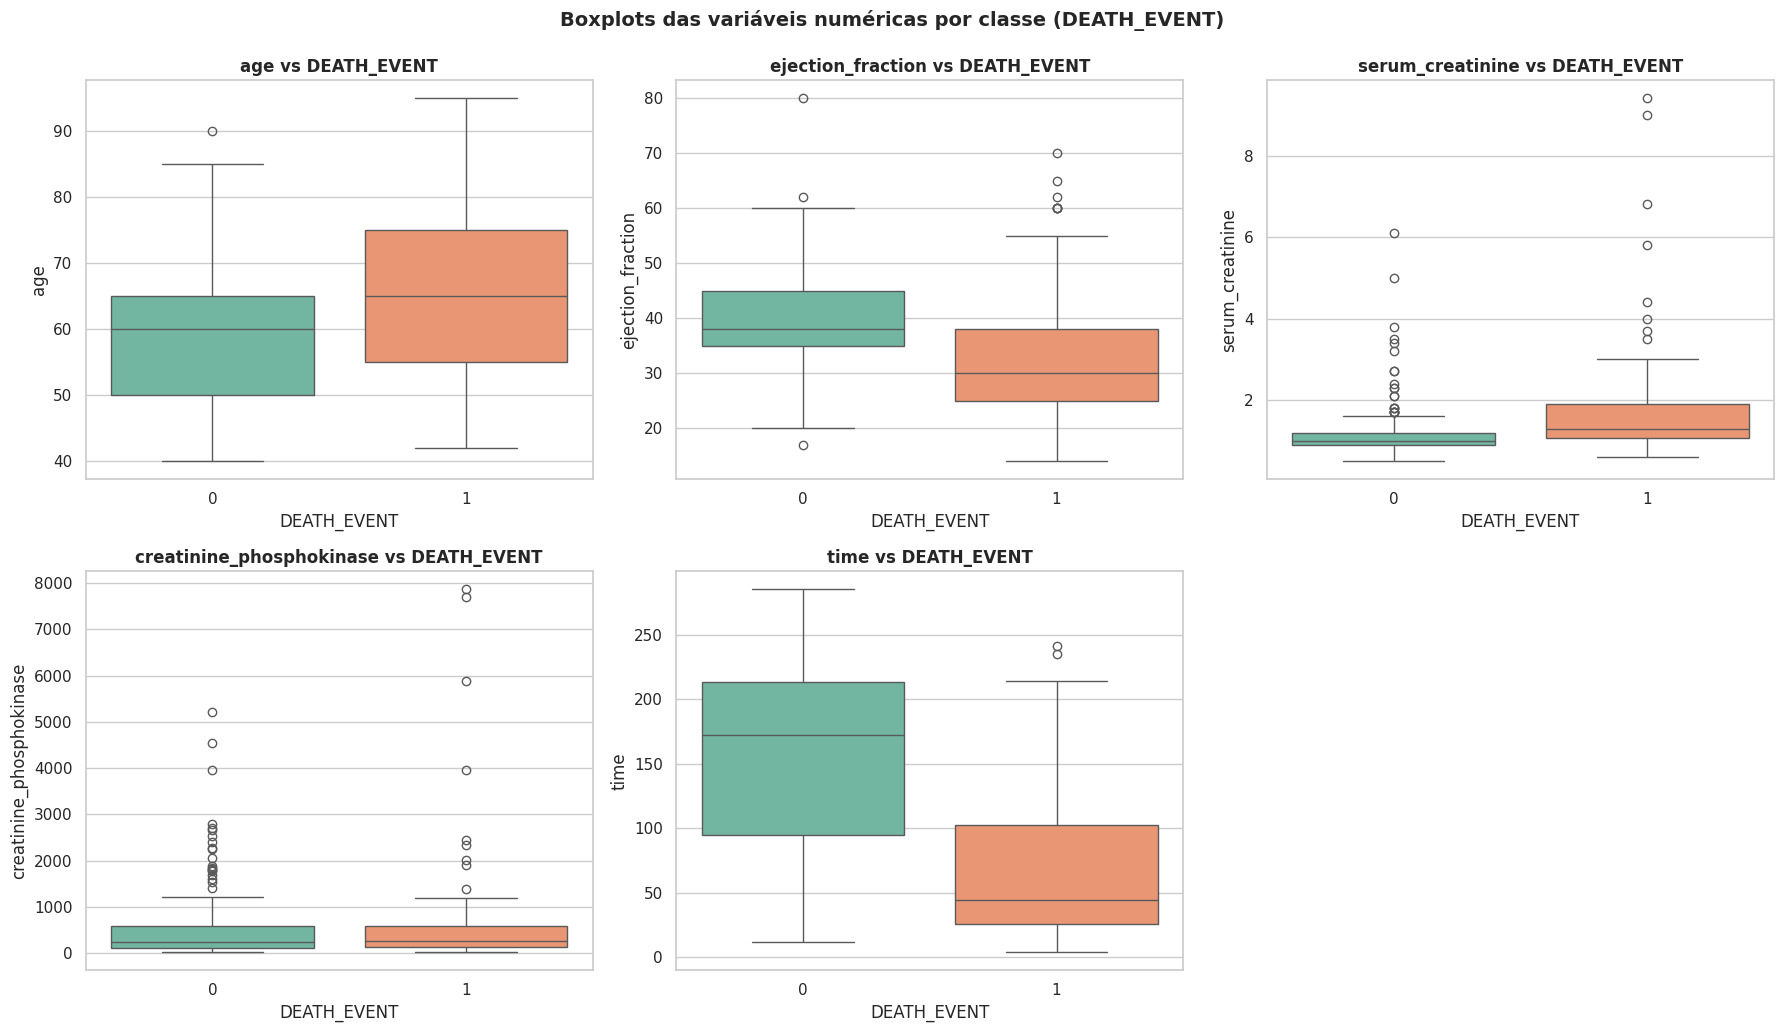

In [28]:
# Verifica se df j√° est√° carregado
if 'df' not in globals():
    import pandas as pd
    url = 'https://raw.githubusercontent.com/maurinhopa/mvp-puc-heart-failure/main/Tratado_heart_failure_clinical_records_dataset.csv'
    df = pd.read_csv(url, sep=';')
    df.loc[185, 'age'] = 65
    df.loc[188, 'age'] = 60

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Estilo visual
sns.set(style="whitegrid")

# Vari√°veis num√©ricas principais
variaveis_numericas = ['age', 'ejection_fraction', 'serum_creatinine',
                       'creatinine_phosphokinase', 'time']

# Criar grid de gr√°ficos
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()

# Gerar um boxplot para cada vari√°vel
for i, var in enumerate(variaveis_numericas):
    sns.boxplot(data=df, x='DEATH_EVENT', y=var, ax=axes[i], palette='Set2')
    axes[i].set_title(f'{var} vs DEATH_EVENT', fontsize=12, fontweight='bold')
    axes[i].set_xlabel('DEATH_EVENT')
    axes[i].set_ylabel(var)

# Remove espa√ßo vazio se sobrar
if len(variaveis_numericas) < len(axes):
    fig.delaxes(axes[-1])

# T√≠tulo geral e ajustes
plt.tight_layout()
plt.suptitle('Boxplots das vari√°veis num√©ricas por classe (DEATH_EVENT)', fontsize=14, fontweight='bold', y=1.03)
plt.show()


### Resultados - Overview

A an√°lise explorat√≥ria por meio de boxplots mostra que vari√°veis como idade, fra√ß√£o de eje√ß√£o, creatinina s√©rica e tempo de acompanhamento apresentam diferen√ßas significativas entre os grupos de √≥bito e sobreviv√™ncia. Isso indica que essas vari√°veis podem ter papel preditivo relevante na constru√ß√£o do modelo de Machine Learning. Algumas vari√°veis, como creatinine_phosphokinase, apresentam muitos outliers e uma separa√ß√£o menos clara, podendo demandar transforma√ß√µes ou an√°lise complementar.
### Detalhamento

**1. age vs DEATH_EVENT**

Idade m√©dia dos mortos (classe 1) √© maior que a dos vivos (classe 0).

Isso refor√ßa que a idade √© um fator relevante para risco de morte por insufici√™ncia card√≠aca.

Os dois grupos t√™m outliers, mas o padr√£o geral √© claro: quanto mais velho, maior o risco.

**2. ejection_fraction vs DEATH_EVENT**

O grupo que morreu tem uma fra√ß√£o de eje√ß√£o menor.

Isso bate com a literatura: fra√ß√£o de eje√ß√£o baixa = cora√ß√£o est√° bombeando mal.

Vari√°vel bem importante, parece discriminativa para o modelo.

**3. serum_creatinine vs DEATH_EVENT**

Os que morreram t√™m n√≠veis ligeiramente mais altos de creatinina s√©rica.

√â um marcador de fun√ß√£o renal ‚Äî e fun√ß√£o renal ruim aumenta risco card√≠aco.

Muitos outliers no grupo de mortos, o que indica poss√≠vel instabilidade cl√≠nica.

**4. creatinine_phosphokinase vs DEATH_EVENT**

Essa vari√°vel tem muitos outliers, dos dois lados.

N√£o parece ter uma separa√ß√£o t√£o clara entre vivos e mortos.

Pode ter import√¢ncia, mas √© menos √≥bvia ‚Äî precisaria de an√°lise complementar ou normaliza√ß√£o.

**5. time vs DEATH_EVENT**

O tempo que o paciente ficou em observa√ß√£o √© claramente maior entre os que sobreviveram.

Os que morreram geralmente morreram mais cedo.

Forte potencial preditivo ‚Äî mas cuidado: √© uma vari√°vel que pode "olhar pro futuro", dependendo da l√≥gica do modelo.

### Sobre a Vari√°vel [AGE]

Embora a vari√°vel age apresente uma clara diferen√ßa entre os grupos de √≥bito e sobreviv√™ncia, os autores do estudo original observaram que sua exclus√£o resultava em modelos com desempenho superior. Isso pode estar relacionado a colinearidade/redund√¢ncia de informa√ß√£o, overfitting, ou ainda ao vi√©s da amostra. Portanto, mesmo sendo preditiva, age pode ter reduzido a capacidade do modelo de generalizar, impactando negativamente m√©tricas como F1-score. Dessa forma, mesmo atributos com forte correla√ß√£o aparente podem ser removidos estrategicamente para melhorar a generaliza√ß√£o do modelo.


## 6.3 An√°lise sobre atributos booleanos - Gr√°fico em Barras

Para os atributos booleanos, optamos por uma visualiza√ß√£o baseada em gr√°ficos de barras empilhadas com r√≥tulos percentuais. Essa abordagem permite observar, para cada valor da vari√°vel (ex: presen√ßa ou aus√™ncia de anemia), a propor√ß√£o de pacientes que sobreviveram ou morreram (DEATH_EVENT).

Essa visualiza√ß√£o √© especialmente √∫til em problemas de classifica√ß√£o bin√°ria, pois revela ind√≠cios de associa√ß√£o entre os atributos e o desfecho. A compara√ß√£o das propor√ß√µes entre as classes fornece sinais sobre o poss√≠vel impacto de cada vari√°vel na mortalidade.

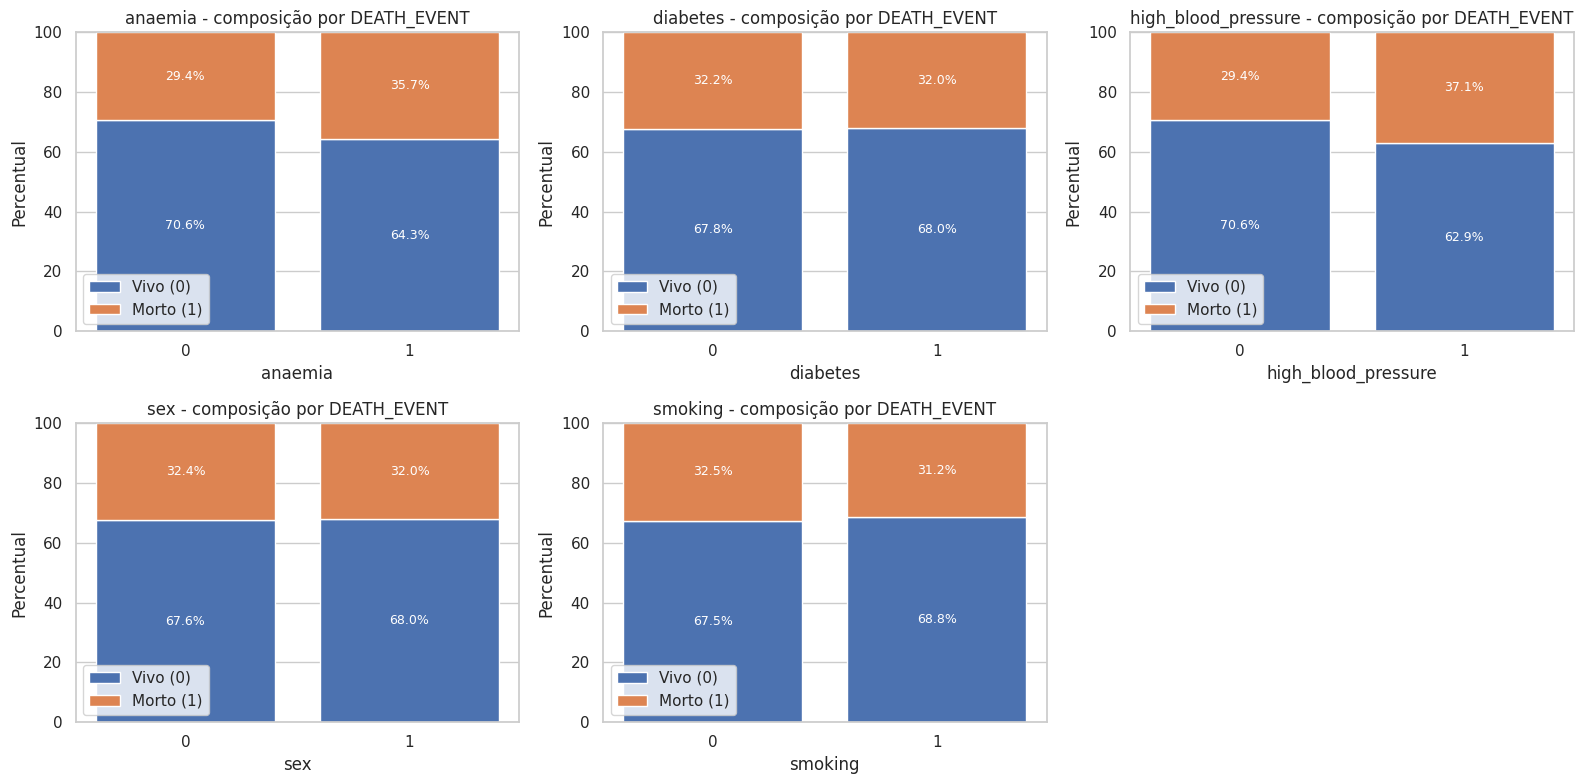

In [29]:
import matplotlib.pyplot as plt

# Lista de vari√°veis booleanas
variaveis_booleanas = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']

# Cria gr√°fico de barras empilhadas com percentual para cada vari√°vel booleana
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 8))
axes = axes.flatten()

for i, var in enumerate(variaveis_booleanas):
    # Calcula percentual de vivos e mortos para cada valor da vari√°vel (0 ou 1)
    percentual = df.groupby([var, 'DEATH_EVENT']).size().unstack().fillna(0)
    percentual = percentual.div(percentual.sum(axis=1), axis=0) * 100

    # Plota gr√°fico de barra empilhada
    ax = axes[i]
    bottom = [0] * len(percentual)
    for death_event in [0, 1]:
        label = 'Vivo (0)' if death_event == 0 else 'Morto (1)'
        heights = percentual[death_event]
        ax.bar(percentual.index.astype(str), heights, bottom=bottom, label=label)

        # R√≥tulos com os valores em cima das barras
        for j, val in enumerate(heights):
            ax.text(j, bottom[j] + val / 2, f'{val:.1f}%', ha='center', va='center', color='white', fontsize=9)
            bottom[j] += val

    ax.set_title(f'{var} - composi√ß√£o por DEATH_EVENT')
    ax.set_xlabel(var)
    ax.set_ylabel('Percentual')
    ax.set_ylim(0, 100)
    ax.legend()

# Remove gr√°fico vazio se n√∫mero de gr√°ficos for √≠mpar
if len(variaveis_booleanas) < len(axes):
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()


### Resultados - Overview

Interpreta√ß√£o de cada vari√°vel:

**1. anaemia**

Mortes: 35,7% com anemia vs 29,4% sem.

Poss√≠vel risco levemente aumentado com anemia.

**2. diabetes**

Praticamente nenhuma diferen√ßa entre os grupos (32,2% vs 32,0%).

N√£o parece relevante isoladamente.

**3. high_blood_pressure**

Mortes: 37,1% com press√£o alta vs 29,4% sem.

Pode ter influ√™ncia significativa no desfecho.

**4. sex**

Homens (1) e mulheres (0) t√™m taxas bem pr√≥ximas (32% vs 32,4%).

Pouca diferen√ßa, mas precisa de testes estat√≠sticos para cravar.

**5. smoking**

Mortes: 31,2% fumantes vs 32,5% n√£o fumantes.

Contraintuitivo ‚Äî fumantes morreram proporcionalmente menos.

Pode estar correlacionado com outra vari√°vel (ex: idade menor entre fumantes).

A an√°lise dos gr√°ficos revela que, em alguns atributos booleanos, h√° varia√ß√µes discretas nas propor√ß√µes de √≥bitos entre os grupos:

Pacientes com press√£o alta (high_blood_pressure = 1) tiveram maior propor√ß√£o de morte (37,1%) do que os sem press√£o alta (29,4%).

Entre os pacientes com anemia, a taxa de √≥bito tamb√©m foi ligeiramente superior (35,7% contra 29,4%).

Para diabetes, sexo e tabagismo, as diferen√ßas entre as classes foram pequenas, sugerindo baixa capacidade discriminativa isolada.

Esses padr√µes sugerem que algumas vari√°veis podem ter papel preditivo modesto, enquanto outras, como high_blood_pressure, merecem aten√ß√£o. Ainda assim, √© importante ressaltar que rela√ß√µes isoladas n√£o garantem causalidade ‚Äî a an√°lise combinada (com modelos) ser√° mais conclusiva.



## 6.4 An√°lise de correla√ß√£o entre vari√°veis - Heatmap

Ap√≥s a an√°lise individual de cada atributo, realizamos agora uma an√°lise combinada por meio de um heatmap de correla√ß√£o de Pearson.

O objetivo √© identificar poss√≠veis rela√ß√µes lineares entre as vari√°veis ‚Äî especialmente entre os atributos preditores e a vari√°vel-alvo DEATH_EVENT.

Essa etapa √© fundamental por dois motivos:

Permite observar poss√≠veis redund√¢ncias entre vari√°veis (alta correla√ß√£o entre preditores).

Indica quais vari√°veis t√™m maior correla√ß√£o com a vari√°vel-alvo, o que pode ajudar na sele√ß√£o de atributos relevantes para o modelo.

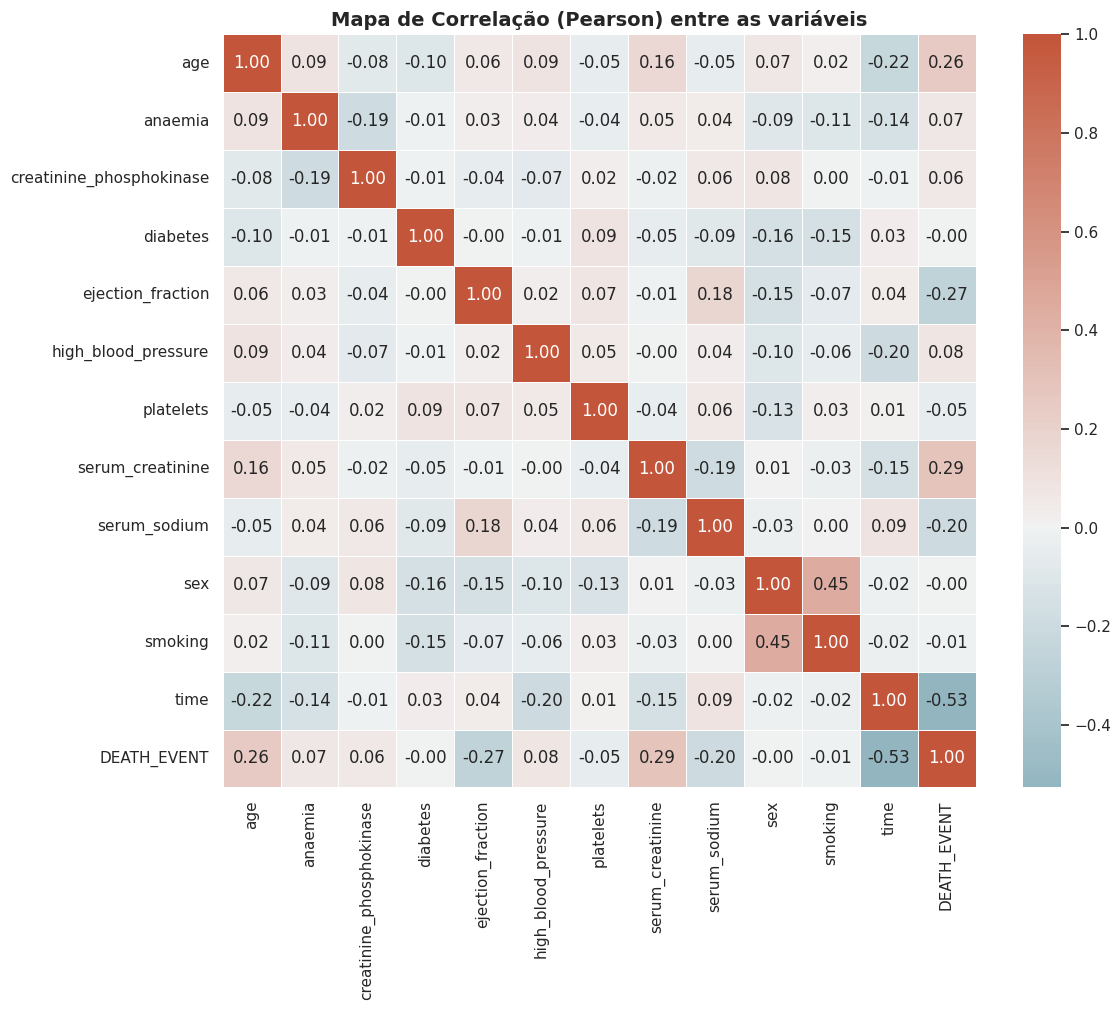

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcula a matriz de correla√ß√£o de Pearson
corr = df.corr(method='pearson')

# Define uma paleta de cores personalizada
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Define o tamanho da figura
plt.figure(figsize=(12, 10))

# Plota o heatmap
sns.heatmap(corr, annot=True, fmt=".2f", cmap=cmap, center=0, linewidths=0.5, square=True)

plt.title('Mapa de Correla√ß√£o (Pearson) entre as vari√°veis', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


## Resultados - Overview

Este gr√°fico √© um heatmap de correla√ß√£o de Pearson, uma ferramenta visual que mede a for√ßa e a dire√ß√£o de uma rela√ß√£o linear entre duas vari√°veis.Nossa an√°lise principal foca-se na √∫ltima linha/coluna, que mostra como cada vari√°vel se correlaciona com o evento de interesse: DEATH_EVENT.

#### **An√°lise das Correla√ß√µes com DEATH_EVENT (O Alvo)**

Esta √© a parte mais importante da an√°lise, pois nos diz quais fatores est√£o mais associados √† ocorr√™ncia de um evento de morte.

**time (-0.53)**: Esta √© a correla√ß√£o mais relevante no gr√°fico com DEATH_EVENT. √â uma correla√ß√£o negativa moderada a forte.

Conforme a vari√°vel time (tempo de acompanhamento) diminui, a probabilidade de um DEATH_EVENT aumenta. Isso confirma o que vimos nos boxplots: pacientes que morrem t√™m, por defini√ß√£o, um tempo de acompanhamento menor.

**serum_creatinine (0.29)**: Correla√ß√£o positiva fraca.

Pacientes com n√≠veis mais altos de creatinina tendem levemente a ter maior mortalidade. Isso refor√ßa a ideia de que a piora da fun√ß√£o renal √© um fator de risco, contudo, a rela√ß√£o √© fraca e exige cautela. Indica ser relevante no modelo quando combinada com outras vari√°veis.

**ejection_fraction (-0.27)**: Correla√ß√£o negativa fraca.

Uma fra√ß√£o de eje√ß√£o mais baixa (pior fun√ß√£o de bombeamento do cora√ß√£o) est√° associada a uma maior chance de DEATH_EVENT, ainda que fraca isoladamente, se mostra coerente com a literatura cl√≠nica.

**age (0.26)**: Correla√ß√£o positiva fraca.

Idade mais avan√ßada est√° associada a uma maior probabilidade de DEATH_EVENT, ainda que a rela√ß√£o seja sutil. Mesmo sendo fortemente intuititiva e geralmente preditiva, no artigo original foi removida por overfitting. (AJUSTAR)

**serum_sodium (-0.20)**: Correla√ß√£o negativa fraca.

N√≠veis mais baixos de s√≥dio no sangue est√£o levemente associados a um aumento na chance de DEATH_EVENT.

**Outras Vari√°veis**: high_blood_pressure (0.08), anaemia (0.07), creatinine_phosphokinase (0.06), etc., t√™m correla√ß√µes muito fracas (pr√≥ximas de zero) com DEATH_EVENT. Isso sugere que, isoladamente e de forma linear, elas n√£o s√£o fortes preditores do evento de morte.


### Correla√ß√µes Not√°veis Entre as Outras Vari√°veis
Analisar as correla√ß√µes entre as vari√°veis preditoras tamb√©m √© importante, principalmente para evitar problemas de multicolinearidade em alguns modelos de machine learning.

**smoking e sex (0.45)**: Existe uma correla√ß√£o positiva moderada entre sexo e tabagismo.

Interpreta√ß√£o: Isso provavelmente significa que um dos sexos (tipicamente codificado como 1, que costuma ser masculino em muitos datasets) tem uma propor√ß√£o maior de fumantes nesta amostra.

Em consist√™ncia com os resultados anteriores, este heatmap apresenta resultados que corroboram com a an√°lise dos boxplots. As vari√°veis que mostraram as maiores diferen√ßas visuais entre os grupos (age, ejection_fraction, serum_creatinine, time) s√£o as mesmas que apresentam os maiores coeficientes de correla√ß√£o com DEATH_EVENT.

Ainda que a maioria das vari√°veis possuam correla√ß√£o desprez√≠vel com a vari√°vel-alvo, os modelos de ML podem aprender padr√µes complexos combinando essas vari√°veis, extraindo informa√ß√µes mesmo de correla√ß√µes fracas.

Principais Preditores: time, serum_creatinine, ejection_fraction, e age s√£o os indicadores lineares mais fortes de DEATH_EVENT neste dataset.

Limita√ß√£o: A correla√ß√£o de Pearson mede apenas rela√ß√µes lineares. √â poss√≠vel que existam rela√ß√µes n√£o-lineares importantes que n√£o s√£o capturadas aqui (por exemplo, um n√≠vel "√≥timo" de uma vari√°vel, onde tanto valores muito altos quanto muito baixos s√£o ruins).

Pr√≥ximo Passo: As vari√°veis identificadas como mais correlacionadas s√£o candidatas ideais para serem inclu√≠das como "features" (caracter√≠sticas) em um modelo de machine learning (como Regress√£o Log√≠stica, Random Forest, etc.) para prever a probabilidade de DEATH_EVENT para um paciente.




# 7. Pr√©-processamento e padroniza√ß√£o

Nesta etapa, realizamos opera√ß√µes essenciais de tratamento e prepara√ß√£o dos dados para garantir que o conjunto esteja em condi√ß√µes ideais para ser utilizado em modelos de aprendizado de m√°quina.

Embora essa base j√° tenha sido disponibilizada limpa pelos autores, h√° alguns ajustes e transforma√ß√µes que podem ser aplicados para potencializar a performance dos algoritmos e a qualidade da an√°lise.

As opera√ß√µes escolhidas nesta etapa seguiram tanto as boas pr√°ticas da literatura quanto os achados da an√°lise explorat√≥ria.

## 7.1 Etapa de Padroniza√ß√£o

Selecionamos esta transforma√ß√£o pois as vari√°veis apresentam escalas muito diferentes, o que pode comprometer o desempenho de determinados algor√≠timos. Isso ocorre pois se uma vari√°vel tem valores entre 0 e 1, e outra entre 0 a 10.000, a que tem maior escala pode dominar a aprendizagem, mesmo sendo menos relevante.

Dessa forma, para garantir equidade entre os atributos e evitar vi√©s por escala, aplicamos a padroniza√ß√£o apenas sobre as vari√°veis num√©ricas cont√≠nuas, mantendo as bin√°rias (0 ou 1) como est√£o.

As vari√°veis padronizadas, ser√£o:

1. age ‚Äì idade do paciente

2. creatinine_phosphokinase ‚Äì enzima CPK no sangue

3. ejection_fraction ‚Äì porcentagem de sangue ejetado pelo cora√ß√£o

4. platelets ‚Äì contagem de plaquetas

5. serum_creatinine ‚Äì n√≠vel de creatinina s√©rica

6. serum_sodium ‚Äì n√≠vel de s√≥dio no sangue

7. time ‚Äì tempo de acompanhamento do paciente (em dias)

Conforme dito anteriormente, essas vari√°veis s√£o numericamente cont√≠nuas e com escalas distintas, por isso foram escolhidas para passar pelo StandardScaler.

Vari√°veis bin√°rias como sex, diabetes, smoking, anaemia, high_blood_pressure e DEATH_EVENT n√£o foram transformadas, pois j√° est√£o normalizadas naturalmente em 0 ou 1, e alterar sua escala quebraria o significado l√≥gico dessas categorias.





In [31]:
from sklearn.preprocessing import StandardScaler

# Seleciona apenas vari√°veis num√©ricas cont√≠nuas (exclui vari√°veis bin√°rias)
variaveis_continuas = ['age', 'creatinine_phosphokinase', 'ejection_fraction',
                       'platelets', 'serum_creatinine', 'serum_sodium', 'time']

# Inicializa o scaler
scaler = StandardScaler()

# Aplica a padroniza√ß√£o
df_scaled = df.copy()
df_scaled[variaveis_continuas] = scaler.fit_transform(df[variaveis_continuas])

# Exibe as primeiras linhas da base padronizada
df_scaled.head()



age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  1.19        0                      0.00         0              -1.53   
1 -0.49        0                      7.51         0              -0.01   
2  0.35        0                     -0.45         0              -1.53   
3 -0.91        1                     -0.49         0              -1.53   
4  0.35        1                     -0.44         1              -1.53   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1       0.02              0.49         -1.50    1   
1                    0       0.00             -0.28         -0.14    1   
2                    0      -1.04             -0.09         -1.73    1   
3                    0      -0.55              0.49          0.09    1   
4                    0       0.65              1.26         -4.68    0   

   smoking  time  DEATH_EVENT  
0        0 -1.63            1  
1        0 -1.60            1  
2        1 -1.59            1  
3        0 -1.59            1  
4        0 -1.58            1

A partir da visualiza√ß√£o das primeiras linhas do dataset padronizado, √© poss√≠vel confirmar que a transforma√ß√£o foi bem-sucedida. As vari√°veis cont√≠nuas ‚Äî como age, ejection_fraction, serum_creatinine, time, entre outras ‚Äî passaram a apresentar valores centralizados pr√≥ximos de 0, com varia√ß√µes positivas e negativas dentro de uma faixa padronizada.

Esse comportamento indica que a padroniza√ß√£o via z-score foi corretamente aplicada, tornando os dados compar√°veis entre si e prontos para serem utilizados em modelos sens√≠veis √† escala.

Importante notar que as vari√°veis bin√°rias (anaemia, diabetes, high_blood_pressure, sex, smoking, DEATH_EVENT) foram preservadas em seu formato original (0 ou 1), evitando distor√ß√µes de interpreta√ß√£o.

Em modelos sens√≠veis √† escala, como regress√£o log√≠stica, KNN, SVM ou redes neurais, a falta de padroniza√ß√£o pode levar o algoritmo a priorizar indevidamente vari√°veis com valores absolutos mais altos, mesmo que sejam menos relevantes do ponto de vista preditivo. Ao aplicar o z-score, damos a todas as vari√°veis cont√≠nuas igual peso estat√≠stico, permitindo que o modelo aprenda com base na varia√ß√£o relativa dos dados, e n√£o em seus valores brutos.

A partir de agora, este dataset padronizado servir√° como base para a etapa de modelagem, aumentando a estabilidade dos pesos durante o treinamento e oferecendo um ambiente estatisticamente equilibrado e mais adequado para o treinamento dos algoritmos de machine learning.

### Outras opera√ß√µes de transforma√ß√£o

Ap√≥s a an√°lise das caracter√≠sticas do dataset, conclu√≠mos que a √∫nica opera√ß√£o de pr√©-processamento realmente necess√°ria era a padroniza√ß√£o das vari√°veis cont√≠nuas, por meio da t√©cnica de z-score. Essa transforma√ß√£o foi aplicada com sucesso e trouxe as vari√°veis para uma escala comum (m√©dia 0, desvio-padr√£o 1), garantindo que nenhuma dominasse a aprendizagem do modelo por conta da magnitude dos seus valores.

Outras opera√ß√µes, como one-hot encoding ou discretiza√ß√£o, n√£o se mostraram necess√°rias neste caso: todas as vari√°veis categ√≥ricas j√° est√£o devidamente binarizadas (0 ou 1), e as vari√°veis cont√≠nuas s√£o mais bem exploradas mantendo sua granularidade original. Tamb√©m n√£o foi realizada remo√ß√£o de outliers, pois os modelos preditivos escolhidos (como regress√£o log√≠stica) s√£o relativamente robustos a esse tipo de varia√ß√£o, e os valores extremos encontrados refletem varia√ß√µes fisiol√≥gicas reais, como no caso da enzima CPK.

### Tratamento de valores faltantes

Durante a etapa de pr√©-processamento, verificamos que n√£o h√° valores faltantes formais (NaN) no dataset. No entanto, durante a an√°lise explorat√≥ria inicial, identificamos dois registros com valores inv√°lidos na coluna age, onde constavam idades acima de 60 mil anos ‚Äî claramente fruto de erro de entrada. Esse problema foi tratado diretamente naquela etapa, com uma estrat√©gia bem fundamentada: segmentamos registros semelhantes com base em atributos cl√≠nicos e imputamos a mediana de idade de cada grupo correspondente.

Como esse tratamento j√° foi realizado com todo o cuidado, optamos por n√£o repetir a interven√ß√£o nesta fase, mantendo o foco na padroniza√ß√£o das vari√°veis cont√≠nuas e preserva√ß√£o das vari√°veis bin√°rias. Com isso, conclu√≠mos que o dataset encontra-se livre de inconsist√™ncias e pronto para uso em modelagem preditiva.

# 8. Visualiza√ß√µes p√≥s-processamento

Justificativa das vari√°veis escolhidas (serum_creatinine e ejection_fraction)

Essas duas vari√°veis foram escolhidas para reavalia√ß√£o por dois motivos principais:

Distribui√ß√£o assim√©trica:

Ambas apresentam distribui√ß√µes n√£o normais, com cauda longa (valores extremos).

Isso foi observado nos histogramas anteriores, que mostraram concentra√ß√µes em um lado da curva.

Relev√¢ncia cl√≠nica e preditiva:

Segundo o artigo-base, essas duas vari√°veis s√£o as mais fortemente associadas √† mortalidade, sendo as √∫nicas mantidas nos modelos com melhor desempenho.

Ou seja, al√©m de estatisticamente sens√≠veis, s√£o clinicamente centrais para o problema.

Portanto, faz sentido t√©cnico e cl√≠nico reavaliar seu comportamento ap√≥s a padroniza√ß√£o, validando se o pr√©-processamento afetou a percep√ß√£o dos dados.



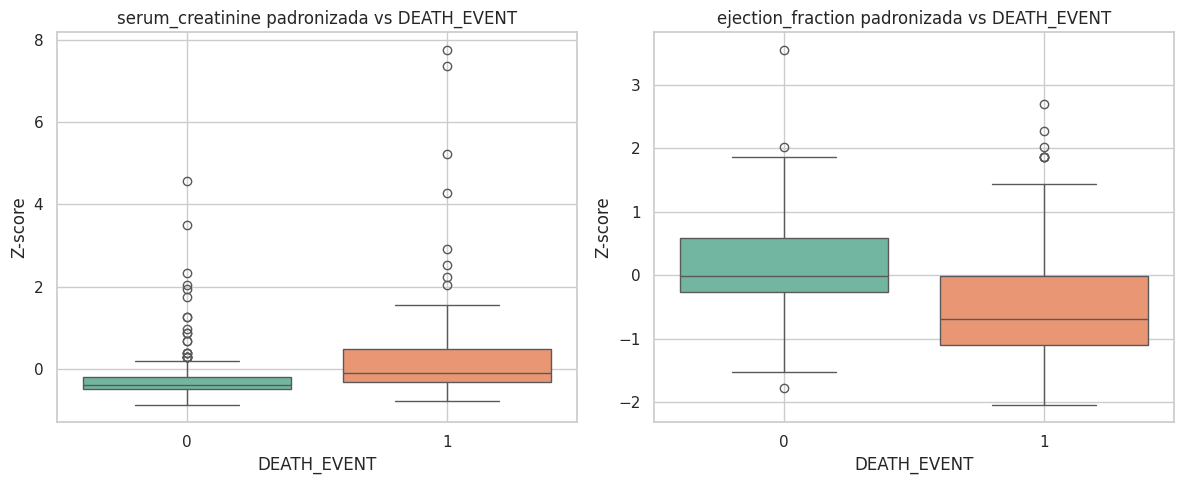

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Define as vari√°veis mais relevantes ap√≥s padroniza√ß√£o
variaveis_alvo = ['serum_creatinine', 'ejection_fraction']

# Cria os boxplots lado a lado, segmentados por DEATH_EVENT
plt.figure(figsize=(12, 5))

for i, var in enumerate(variaveis_alvo, 1):
    plt.subplot(1, 2, i)
    sns.boxplot(data=df_scaled, x='DEATH_EVENT', y=var, palette='Set2')
    plt.title(f'{var} padronizada vs DEATH_EVENT', fontsize=12)
    plt.xlabel('DEATH_EVENT')
    plt.ylabel('Z-score')
    plt.grid(True)

plt.tight_layout()
plt.show()



A compara√ß√£o entre os boxplots originais e os boxplots padronizados demonstrou que a forma geral das distribui√ß√µes se manteve, como esperado. No entanto, ao adotar a escala padronizada (Z-score), o eixo y passou a representar unidades de desvio padr√£o, o que traz vantagens importantes: facilita a compara√ß√£o entre vari√°veis com escalas diferentes, destaca outliers de maneira mais uniforme e prepara os dados adequadamente para algoritmos que pressup√µem vari√°veis centradas e escaladas, como regress√£o log√≠stica, SVM e PCA.

Al√©m disso, a visualiza√ß√£o padronizada permitiu observar com mais clareza que pacientes que vieram a √≥bito (DEATH_EVENT = 1) apresentaram, em m√©dia, valores mais altos de creatinina e mais baixos de fra√ß√£o de eje√ß√£o, ambos distantes da m√©dia da popula√ß√£o ‚Äî o que refor√ßa o papel preditivo dessas vari√°veis j√° identificado anteriormente. A padroniza√ß√£o, portanto, manteve os padr√µes relevantes e ao mesmo tempo tornou o conjunto mais adequado para a etapa posterior de modelagem.



# 9. Conclus√£o

Este estudo explorat√≥rio teve como objetivo entender os principais padr√µes e rela√ß√µes presentes no conjunto de dados sobre insufici√™ncia card√≠aca cr√¥nica. Por meio de uma an√°lise cuidadosa e progressiva, foi poss√≠vel identificar vari√°veis com maior poder preditivo, investigar correla√ß√µes relevantes e aplicar t√©cnicas de pr√©-processamento fundamentais como a padroniza√ß√£o. A investiga√ß√£o visual e estat√≠stica refor√ßou achados importantes da literatura, como o papel da fra√ß√£o de eje√ß√£o e da creatinina s√©rica na mortalidade dos pacientes, e preparou o terreno para futuras etapas de modelagem preditiva. Conclui-se, portanto, que uma an√°lise explorat√≥ria estruturada, combinada a boas pr√°ticas de prepara√ß√£o dos dados, √© essencial para garantir a qualidade e a efetividade de modelos de machine learning aplicados √† sa√∫de.

# 10. Se√ß√£o Extra ‚Äì Predi√ß√£o com Interface Interativa (O modelo de Machine Learning)

Para fins explorat√≥rios, foi implementado no Google Colab um modelo de regress√£o log√≠stica treinado com os dados padronizados (Z-score), utilizando todas as vari√°veis dispon√≠veis do dataset. Embora o objetivo do trabalho da PUC se limite at√© o pr√©-processamento, esta se√ß√£o adicional serve como demonstra√ß√£o pr√°tica de aplicabilidade dos dados tratados.

A interface interativa foi constru√≠da com ipywidgets, permitindo que o usu√°rio insira valores manuais para cada vari√°vel (j√° transformados em escala Z), e veja o resultado da previs√£o do modelo ‚Äî "MORTE (1)" ou "N√ÉO MORTE (0)" ‚Äî em tempo real. Isso simula como um sistema automatizado poderia, com base em dados cl√≠nicos, indicar a probabilidade de √≥bito de um paciente com insufici√™ncia card√≠aca.

O modelo utilizado, regress√£o log√≠stica, foi escolhido por ser o mesmo empregado pelos autores do estudo original em parte das an√°lises. Embora o artigo tenha identificado melhor performance com modelos mais complexos (como Random Forest e XGBoost), a regress√£o log√≠stica ainda apresentou desempenho satisfat√≥rio, especialmente com apenas duas vari√°veis preditoras (serum_creatinine e ejection_fraction).

In [35]:
# 1. Importar bibliotecas
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# 2. Definir X (vari√°veis preditoras) e y (vari√°vel alvo)
X = df_scaled.drop('DEATH_EVENT', axis=1)
y = df_scaled['DEATH_EVENT']

# 3. Separar treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Treinar o modelo
modelo = LogisticRegression()
modelo.fit(X_train, y_train)

# 5. Avaliar (s√≥ para curiosidade)
y_pred = modelo.predict(X_test)
print(classification_report(y_test, y_pred))

# 6. Previs√£o manual: inserir os valores manualmente abaixo (valores padronizados)
# Ordem dos campos:
# ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction',
#  'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium',
#  'sex', 'smoking', 'time']

# Exemplo: homem, 65 anos, fra√ß√£o de eje√ß√£o baixa, creatinina alta

# Criar DataFrame com os mesmos nomes de colunas usados no treino
colunas = X_train.columns
valores = [[0.7, 1, 0.2, 0, -1.4, 1, -0.2, 1.8, 0.0, 1, 1, -1.2]]
nova_amostra_df = pd.DataFrame(valores, columns=colunas)

# 7. Rodar previs√£o
predicao = modelo.predict(nova_amostra_df)
print("Resultado da previs√£o:", "MORTE (1)" if predicao[0]==1 else "N√ÉO MORTE (0)")


              precision    recall  f1-score   support

           0       0.77      0.97      0.86        35
           1       0.94      0.60      0.73        25

    accuracy                           0.82        60
   macro avg       0.86      0.79      0.80        60
weighted avg       0.84      0.82      0.81        60

Resultado da previs√£o: MORTE (1)


Resultados do modelo e desempenho preditivo
Ap√≥s o treinamento com o modelo de regress√£o log√≠stica, observamos m√©tricas bastante positivas. O modelo alcan√ßou uma acur√°cia de 82%, indicando que, no conjunto de teste, ele foi capaz de acertar a previs√£o de √≥bito ou sobreviv√™ncia em 8 a cada 10 pacientes.

Destacam-se ainda os seguintes pontos:

A classe 0 (n√£o morte) apresentou alta sensibilidade (recall de 0.97), ou seja, o modelo quase sempre identificou corretamente os pacientes que n√£o morreram.

J√° a classe 1 (morte) teve um precision elevado (0.94), ou seja, quando o modelo indicou √≥bito, na maioria das vezes estava certo. No entanto, seu recall foi mais baixo (0.60), revelando que o modelo ainda deixou de identificar alguns casos reais de √≥bito.

O F1-score de 0.80 para a m√©dia macro mostra um bom equil√≠brio entre precis√£o e sensibilidade nas duas classes.

Esses resultados refor√ßam que, mesmo com um modelo simples e com um n√∫mero limitado de vari√°veis, j√° √© poss√≠vel alcan√ßar bom desempenho preditivo, evidenciando a robustez dos atributos utilizados e a import√¢ncia da etapa de pr√©-processamento (como a padroniza√ß√£o).

Para ilustrar a aplicabilidade pr√°tica do modelo, foi inclu√≠da uma simula√ß√£o de uso real, em que o usu√°rio pode testar diferentes combina√ß√µes de vari√°veis cl√≠nicas j√° padronizadas (Z-score). Embora a vers√£o com interface interativa usando sliders n√£o tenha sido mantida nesta vers√£o por quest√µes de compatibilidade com o GitHub, a l√≥gica do modelo foi preservada. O bloco final permite simular a previs√£o de risco de √≥bito com base em valores inseridos manualmente, demonstrando como o algoritmo pode ser integrado em solu√ß√µes pr√°ticas no contexto da sa√∫de. Essa etapa, apesar de n√£o ser obrigat√≥ria pela PUC, refor√ßa o car√°ter aplicado do projeto e sua utilidade al√©m do ambiente acad√™mico.



In [36]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# --- Usa base padronizada
X = df_scaled.drop('DEATH_EVENT', axis=1)
y = df_scaled['DEATH_EVENT']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo = LogisticRegression()
modelo.fit(X_train, y_train)

# --- Simula√ß√£o de input manual (substitui os widgets)
# Preencha com valores Z-score reais ou simulados para testar
colunas = X_train.columns
valores = [[0.5, 1, -0.2, 0, -1.1, 1, 0.3, 0.7, -0.4, 1, 0, 0.1]]
entrada_simulada = pd.DataFrame(valores, columns=colunas)
resultado = modelo.predict(entrada_simulada)[0]

print("ü©∫ Resultado da previs√£o:", "üî¥ MORTE (1)" if resultado == 1 else "üü¢ N√ÉO MORTE (0)")


ü©∫ Resultado da previs√£o: üü¢ N√ÉO MORTE (0)


# 11. Refer√™ncias
J√° est√° presente no final do notebook
Inclui:

Kaggle / UCI

Paper (Chicco & Jurman, 2020)
